In [11]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
#Downloading with kaggle api
path = kagglehub.dataset_download("kemical/kickstarter-projects")

print("Path to dataset files:", path)

np.random.seed(0)

Path to dataset files: C:\Users\Acer\.cache\kagglehub\datasets\kemical\kickstarter-projects\versions\7


In [14]:
kickstarter = pd.read_csv('../data/ks-projects-201801.csv')
original_data = pd.DataFrame(kickstarter.usd_goal_real)
#Scalling data
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])
print("Head:\n", original_data.head())
print("Maximum value: ", original_data.max())
print("Minimum value: ", original_data.min())
print('_'*30)
print("Head: \n", scaled_data.head())
print("Maximum value: ", scaled_data.max())
print("Minimum value: ", scaled_data.min())

Head:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Maximum value:  usd_goal_real    1.663614e+08
dtype: float64
Minimum value:  usd_goal_real    0.01
dtype: float64
______________________________
Head: 
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Maximum value:  usd_goal_real    1.0
dtype: float64
Minimum value:  usd_goal_real    0.0
dtype: float64


In [19]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Scaling Goals


In [15]:
Orig_data_goals = pd.DataFrame(kickstarter.goal)
scaled_data_goals = minmax_scaling(Orig_data_goals, columns=['goal'])
print("Head:\n", Orig_data_goals.head())
print("Maximum value: ", Orig_data_goals.max())
print("Minimum value: ", Orig_data_goals.min())
print('_'*30)
print("Head: \n", scaled_data_goals.head())
print("Maximum value: ", scaled_data_goals.max())
print("Minimum value: ", scaled_data_goals.min())

Head:
       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Maximum value:  goal    100000000.0
dtype: float64
Minimum value:  goal    0.01
dtype: float64
______________________________
Head: 
        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Maximum value:  goal    1.0
dtype: float64
Minimum value:  goal    0.0
dtype: float64


### Normalizing pledges

In [16]:
index_of_positive_index = kickstarter.usd_pledged_real > 0
positive_pledges = kickstarter.usd_pledged_real.loc[index_of_positive_index]
#Normalized pledges
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)
print("Head: \n", positive_pledges.head())
print("Maximum value: ", positive_pledges.max())
print("Minimum value: ", positive_pledges.min())
print('_'*30)
print("Head: \n", normalized_pledges.head())
print("Maximum value: ", normalized_pledges.max())
print("Minimum value: ", normalized_pledges.min())

Head: 
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Maximum value:  20338986.27
Minimum value:  0.45
______________________________
Head: 
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836852
Name: usd_pledged_real, dtype: float64
Maximum value:  30.690538074206188
Minimum value:  -0.7779954144288868


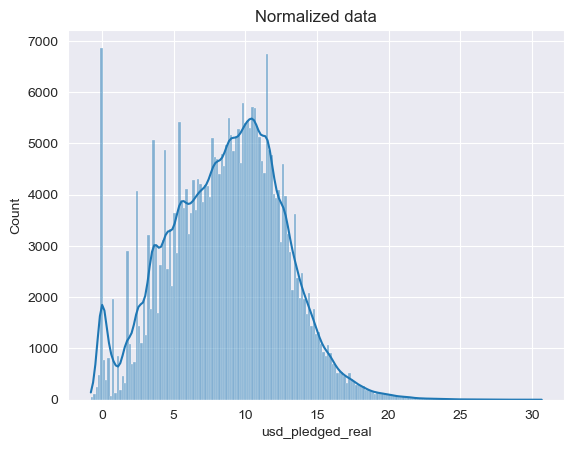

In [22]:
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

### Pledged Column


In [20]:
indexPositiveColumns_Pledged = kickstarter.pledged > 0
positive_pledges = kickstarter.pledged.loc[indexPositiveColumns_Pledged]
#Normalizing
normalPledges = pd.Series(stats.boxcox(positive_pledges)[0], name='pledged', index=positive_pledges.index)
print("Head: \n", positive_pledges.head())
print("Maximum value: ", positive_pledges.max())
print("Minimum value: ", positive_pledges.min())
print("_"*30)
print("Head: \n", normalPledges.head())
print("Maximum value: ", normalPledges.max())
print("Minimum value: ", normalPledges.min())


Head: 
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Maximum value:  20338986.27
Minimum value:  1.0
______________________________
Head: 
 1    10.013886
2     6.403367
3     0.000000
4     9.005192
5    15.499595
Name: pledged, dtype: float64
Maximum value:  29.6303049952761
Minimum value:  0.0


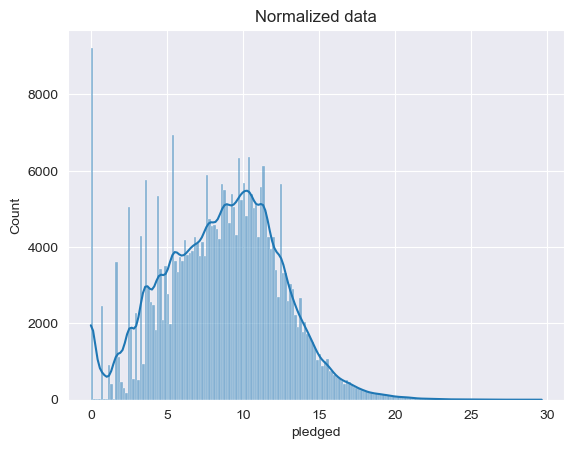

In [23]:
ax1 = sns.histplot(normalPledges, kde=True)
ax1.set_title("Normalized data")
plt.show()

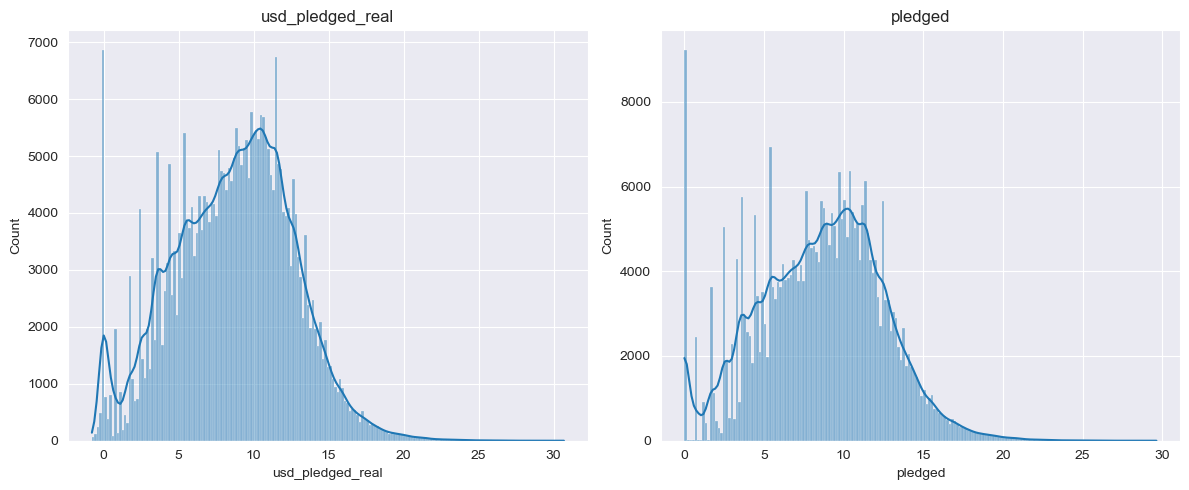

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot first histogram
sns.histplot(normalized_pledges, kde=True, ax=axes[0])  # Assign to the first subplot
axes[0].set_title("usd_pledged_real")

# Plot second histogram
sns.histplot(normalPledges, kde=True, ax=axes[1])  # Assign to the second subplot
axes[1].set_title("pledged")

# Adjust layout and display
plt.tight_layout()
plt.show()
